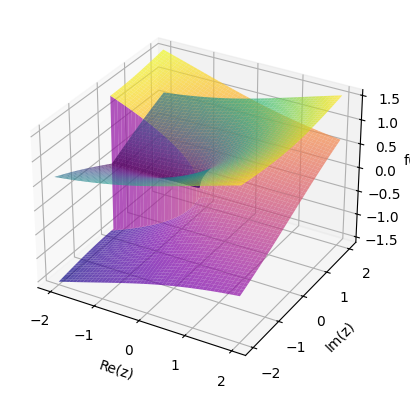

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the function
def f(z):
    return np.sqrt(z)

# Create a meshgrid for the complex plane
x = np.linspace(-2, 2, 400)
y = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x, y)
Z = X + 1j * Y

# Calculate the real and imaginary parts
W = f(Z)
U = np.real(W)
V = np.imag(W)

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, U, cmap='viridis', alpha=0.7)
ax.plot_surface(X, Y, V, cmap='plasma', alpha=0.7)

ax.set_xlabel('Re(z)')
ax.set_ylabel('Im(z)')
ax.set_zlabel('f(z)')
plt.savefig('riemann-surface-ex1.png')
plt.show()


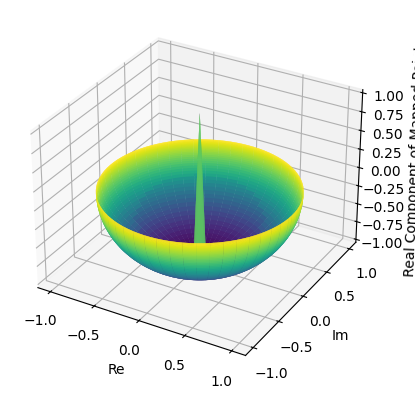

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the function to map complex numbers to points on the sphere
def map_to_sphere(z):
    # Normalize the complex number
    norm = np.abs(z)
    if norm == 0:
        return (0, 0, 1)  # Point at infinity
    else:
        # Map the normalized complex number to points on the sphere
        x = 2 * np.real(z) / (1 + norm**2)
        y = 2 * np.imag(z) / (1 + norm**2)
        z = (norm**2 - 1) / (norm**2 + 1)
        return (x, y, z)

# Generate complex numbers to plot on the sphere
theta = np.linspace(0, 2 * np.pi, 100)
phi = np.linspace(0, np.pi, 100)
theta, phi = np.meshgrid(theta, phi)
z = np.exp(1j * theta) * np.sin(phi)

# Map complex numbers to points on the sphere
points = np.array([map_to_sphere(zi) for zi in z.flatten()]).reshape(z.shape[0], z.shape[1], 3)

# Plot the Riemann sphere
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(points[:, :, 0], points[:, :, 1], points[:, :, 2], cmap='viridis')
ax.set_xlabel('Re')
ax.set_ylabel('Im')
ax.set_zlabel('Real Component of Mapped Point')

plt.savefig('riemann-sphere.png')
plt.show()


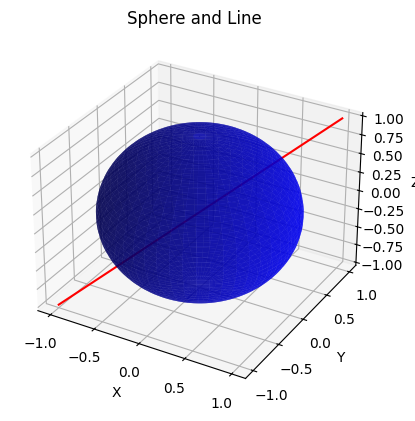

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a sphere centered at the origin
r = 1  # Radius of the sphere
theta = np.linspace(0, 2 * np.pi, 100)
phi = np.linspace(0, np.pi, 100)
theta, phi = np.meshgrid(theta, phi)
x = r * np.sin(phi) * np.cos(theta)
y = r * np.sin(phi) * np.sin(theta)
z = r * np.cos(phi)

# Create a line passing through the origin
t = np.linspace(-1, 1, 100)
line_x = t
line_y = t
line_z = t

# Plot the sphere and the line
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, color='b', alpha=0.7)  # Plot the sphere
ax.plot(line_x, line_y, line_z, color='r')  # Plot the line
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Sphere and Line')
plt.savefig('projective-real-space.png')
plt.show()


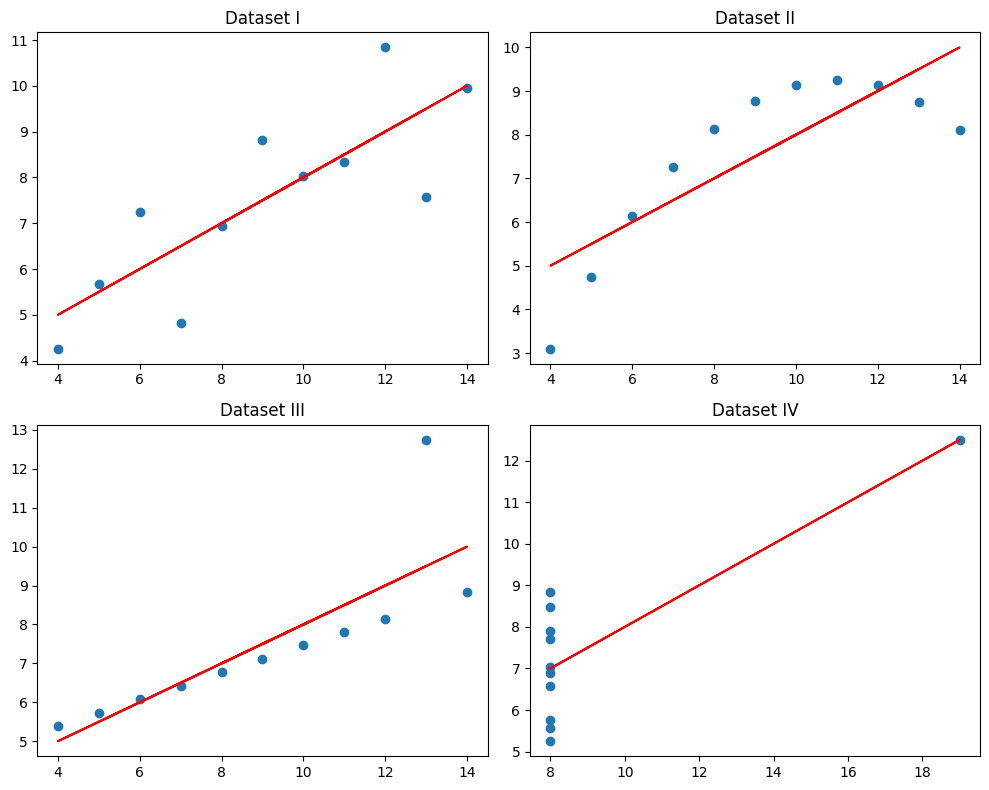

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm

# Load Anscombe's quartet dataset from seaborn
anscombe = sns.load_dataset("anscombe")

# Create a 2x2 grid of plots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Define a function to plot each dataset
def plot_anscombe(ax, dataset):
    data = anscombe[anscombe['dataset'] == dataset]
    ax.scatter(data['x'], data['y'])
    ax.set_title(f'Dataset {dataset}')
    # Add a linear regression line
    X = sm.add_constant(data['x'])
    model = sm.OLS(data['y'], X).fit()
    line = model.params['const'] + model.params['x'] * data['x']
    ax.plot(data['x'], line, color='red')

# Plot each dataset
datasets = ['I', 'II', 'III', 'IV']
for ax, dataset in zip(axs.flatten(), datasets):
    plot_anscombe(ax, dataset)

plt.tight_layout()
plt.show()


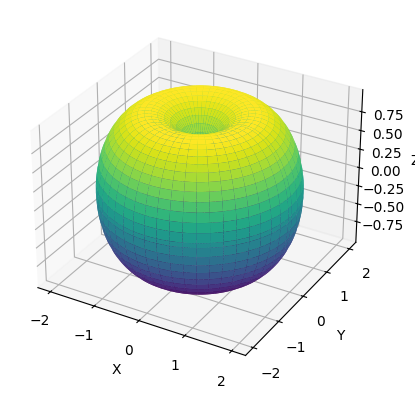

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define parameters for the torus
R = 1  # Major radius
r = 1  # Minor radius

# Create a grid of angles
theta = np.linspace(0, 2 * np.pi, 100)
phi = np.linspace(0, 2 * np.pi, 100)
theta, phi = np.meshgrid(theta, phi)

# Parametric equations for the torus
X = (R + r * np.cos(theta)) * np.cos(phi)
Y = (R + r * np.cos(theta)) * np.sin(phi)
Z = r * np.sin(theta)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

# Set plot labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()


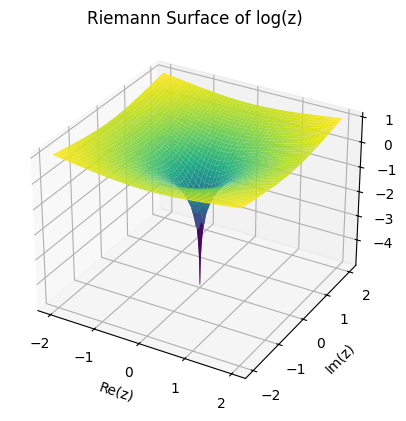

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define a grid of points in the complex plane
x = np.linspace(-2, 2, 400)
y = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x, y)
Z = X + 1j * Y  # Convert to complex numbers

# Compute the logarithm of each point in the grid
log_Z = np.log(Z)

# Plot the Riemann surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, np.real(log_Z), cmap='viridis', edgecolor='none')
ax.set_xlabel('Re(z)')
ax.set_ylabel('Im(z)')
ax.set_zlabel('Re(log(z))')
ax.set_title('Riemann Surface of log(z)')
plt.show()


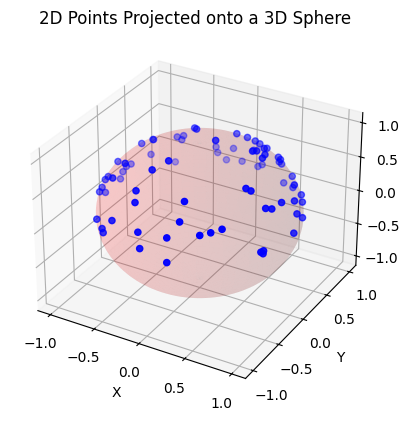

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate some example 2D data points
np.random.seed(0)
num_points = 100
x = np.random.uniform(-1, 1, num_points)
y = np.random.uniform(-1, 1, num_points)

# Normalize the 2D points to fit within the unit circle
r = np.sqrt(x**2 + y**2)
mask = r <= 1
x = x[mask]
y = y[mask]

# Stereographic projection to 3D sphere
z = 2 / (1 + x**2 + y**2) - 1
x_3d = 2 * x / (1 + x**2 + y**2)
y_3d = 2 * y / (1 + x**2 + y**2)

# Visualize the 3D points on a sphere
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the points
ax.scatter(x_3d, y_3d, z, color='blue', s=20)

# Plot the unit sphere for reference
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x_sphere = np.outer(np.cos(u), np.sin(v))
y_sphere = np.outer(np.sin(u), np.sin(v))
z_sphere = np.outer(np.ones(np.size(u)), np.cos(v))

ax.plot_surface(x_sphere, y_sphere, z_sphere, color='r', alpha=0.1)

# Set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('2D Points Projected onto a 3D Sphere')

plt.show()


In [1]:
import numpy as np

def sliding_window(time_series, window_size, step_size):
    n = len(time_series)
    return np.array([time_series[i:i + window_size] for i in range(0, n - window_size + 1, step_size)])

# Example time series data
time_series = np.sin(np.linspace(0, 4 * np.pi, 100))
window_size = 5
step_size = 1

# Convert time series to point cloud
point_cloud = sliding_window(time_series, window_size, step_size)


In [2]:
from scipy.spatial.distance import pdist, squareform

# Compute pairwise distances
distance_matrix = squareform(pdist(point_cloud, 'euclidean'))


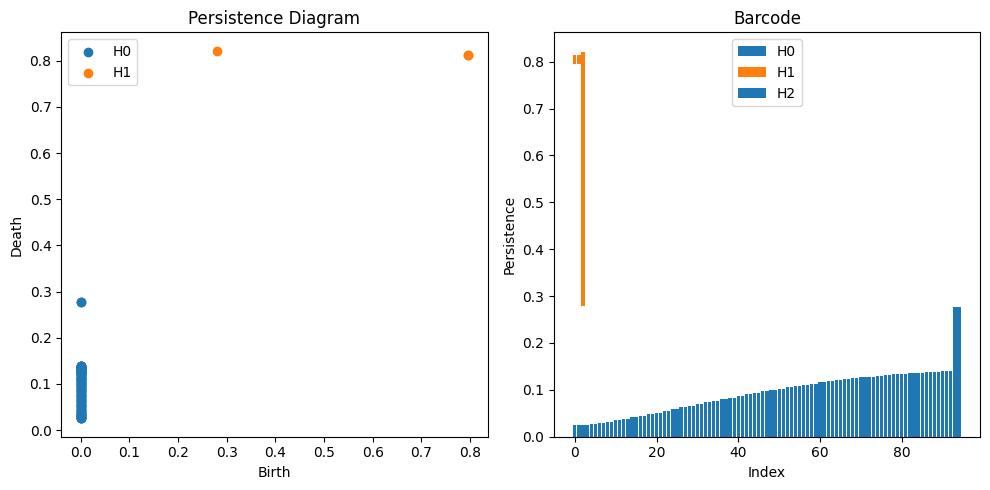

In [3]:
from ripser import ripser
import matplotlib.pyplot as plt

# Compute the Rips complex and its persistent homology
result = ripser(distance_matrix, distance_matrix=True, maxdim=2)

# Plot the persistence diagram
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.title('Persistence Diagram')
plt.scatter(result['dgms'][0][:, 0], result['dgms'][0][:, 1], label='H0')
plt.scatter(result['dgms'][1][:, 0], result['dgms'][1][:, 1], label='H1')
plt.xlabel('Birth')
plt.ylabel('Death')
plt.legend()

# Plot the barcode
plt.subplot(122)
plt.title('Barcode')
for i, dgm in enumerate(result['dgms']):
    plt.bar(range(len(dgm)), dgm[:, 1] - dgm[:, 0], bottom=dgm[:, 0], label=f'H{i}')
plt.xlabel('Index')
plt.ylabel('Persistence')
plt.legend()

plt.tight_layout()
plt.show()
